# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Yusuf Emir Cömert
## Student ID: 2220765023

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
import random
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

housing_df = pd.read_csv('housing.csv')

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [216]:
missing_values = housing_df.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

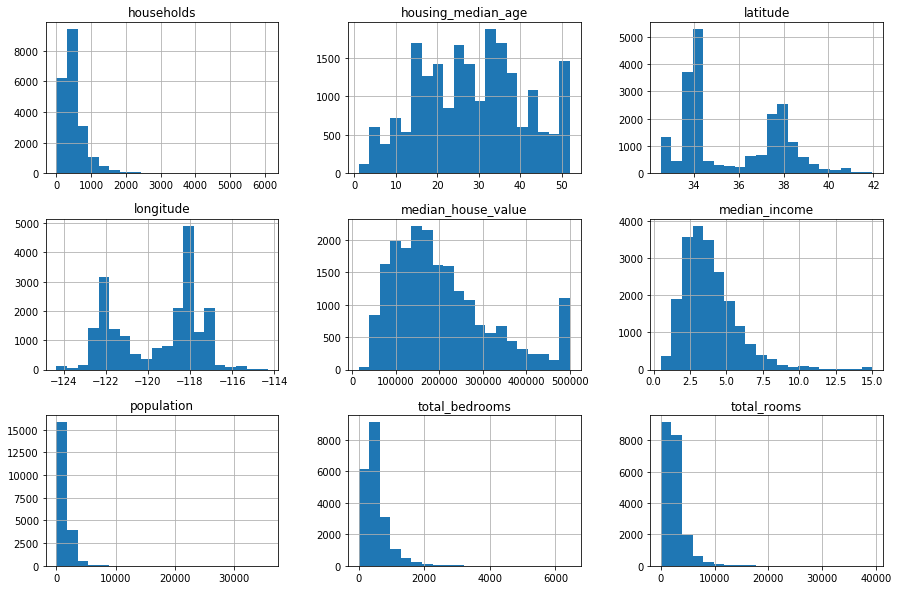

In [217]:
housing_df.hist(bins=20, figsize=(15, 10))
plt.show()

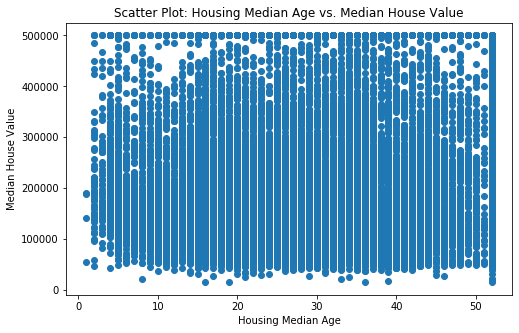

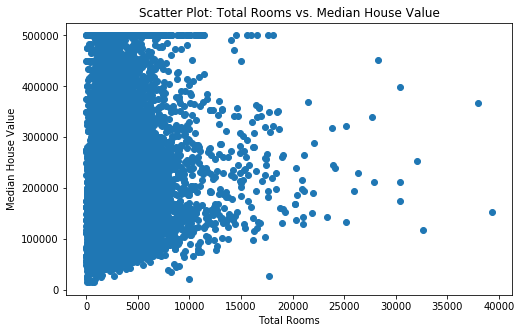

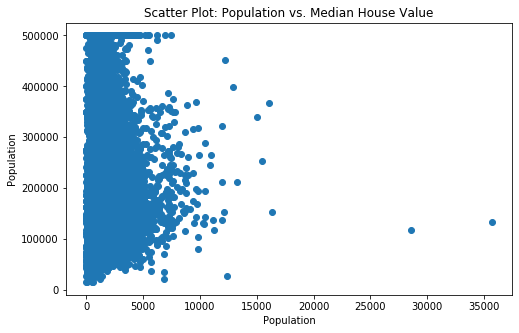

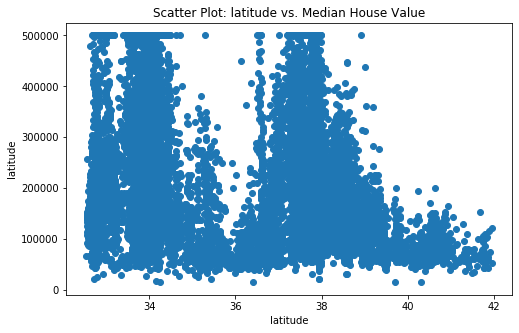

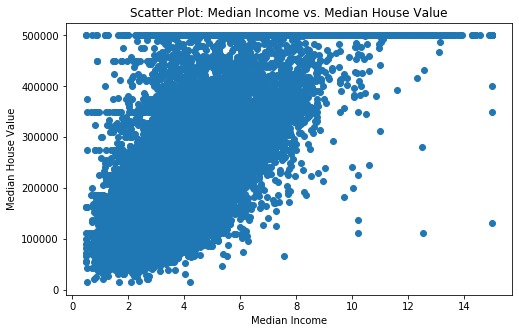

In [218]:
# I did not draw the all features because it is not necessary.
plt.figure(figsize=(8, 5))
plt.scatter(housing_df['housing_median_age'], housing_df['median_house_value'])
plt.title('Scatter Plot: Housing Median Age vs. Median House Value')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(housing_df['total_rooms'], housing_df['median_house_value'])
plt.title('Scatter Plot: Total Rooms vs. Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(housing_df['population'], housing_df['median_house_value'])
plt.title('Scatter Plot: Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Population')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(housing_df['latitude'], housing_df['median_house_value'])
plt.title('Scatter Plot: latitude vs. Median House Value')
plt.xlabel('latitude')
plt.ylabel('latitude')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(housing_df['median_income'], housing_df['median_house_value'])
plt.title('Scatter Plot: Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


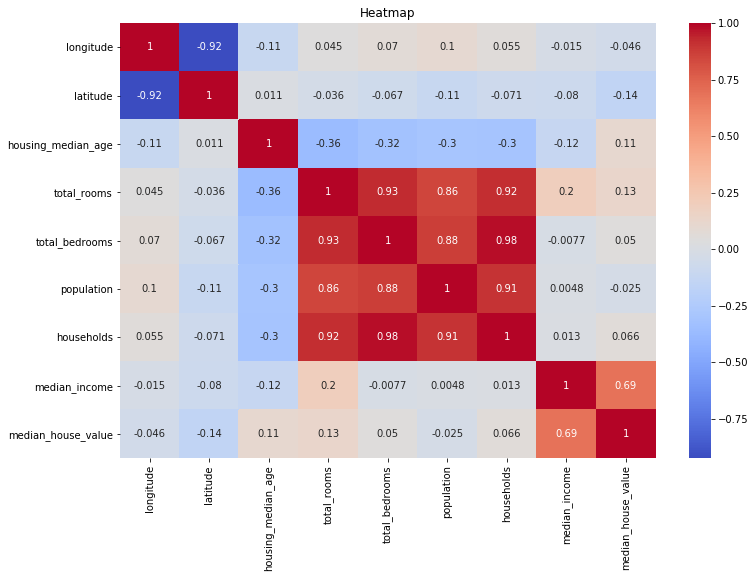

In [219]:
corr_matrix = housing_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

<div style="font-size: large; color: yellow;">
    <ul>
        <li> We can see that there are 207 missing values for total_bedrooms.
        <li> Actually there are not much to comment about because there aren't much any strong corralations between features.
        <li> House median age is distributed well with respect to median house value.
        <li> Houses are distributed a lot between 0-5000 population interval.
        
        
</div>

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [220]:
z_scores = zscore(housing_df.select_dtypes(include=[float, int]))
outliers = (abs(z_scores) > 3).any(axis=1)
df_without_outliers = housing_df[~outliers]

print(housing_df.shape)
housing_df
# I chose Z-Score method to handle outliers because it is more easier to apply in my opinion.

(20640, 10)


c:\Users\YusufEmirComert\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [221]:
without_out = housing_df.copy()
mean_imputed_df = housing_df.copy()
median_imputed_df = housing_df.copy()
categorical_columns = housing_df.select_dtypes(include=['object']).columns


In [222]:
# 2. Outlier removal
without_out = without_out[~outliers]
numeric_columns = housing_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = housing_df.select_dtypes(include=['object']).columns


In [223]:
# 3. Mean Imputation (Use Mode imputation for categorical variables)
mean_value = housing_df['total_bedrooms'].mean()
mean_imputed_df['total_bedrooms'].fillna(mean_value, inplace=True)
mean_imputed_df.isnull().sum()

# Mode imputation for categorical variables
mode_value = housing_df[categorical_columns].mode().iloc[0]
mean_imputed_df[categorical_columns].fillna(mode_value, inplace=True)

mean_imputed_df.isnull().sum()

c:\Users\YusufEmirComert\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [224]:
# 4. Median Imputation (Use Mode imputation for categorical variables)
median_values = housing_df.median()
median_imputed_df.fillna(median_values, inplace=True)

# Mode imputation for categorical variables
mode_values = housing_df.mode().iloc[0]
median_imputed_df.fillna(mode_values, inplace=True)

median_imputed_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [225]:
ordinal_feature = 'ocean_proximity'
ordinal_categories = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

encoder = OrdinalEncoder(categories=[ordinal_categories])
housing_df[ordinal_feature] = encoder.fit_transform(housing_df[[ordinal_feature]])
df_without_outliers[ordinal_feature] = encoder.fit_transform(df_without_outliers[[ordinal_feature]])
mean_imputed_df[ordinal_feature] = encoder.fit_transform(mean_imputed_df[[ordinal_feature]])
median_imputed_df[ordinal_feature] = encoder.fit_transform(median_imputed_df[[ordinal_feature]])




housing_df.head()

c:\Users\YusufEmirComert\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [226]:
indices = random.sample(range(len(housing_df)), len(housing_df))
shuffled_df = housing_df.iloc[indices]
shuffled_df = shuffled_df.dropna()
df_without_outliers = df_without_outliers.dropna()

train_size = int(len(shuffled_df) * 0.7)

train_original = shuffled_df[:train_size]
test_original = shuffled_df[train_size:]

train_without_outliers = df_without_outliers[:train_size]
test_without_outliers = df_without_outliers[train_size:]

train_mean_imputed = mean_imputed_df[:train_size]
test_mean_imputed = mean_imputed_df[train_size:]

train_median_imputed = median_imputed_df[:train_size]
test_median_imputed = median_imputed_df[train_size:]


print("Train shape:", train_original.shape)
print("Test shape:", test_original.shape)



Train shape: (14303, 10)
Test shape: (6130, 10)


# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

KNN Regression for Original Dataset

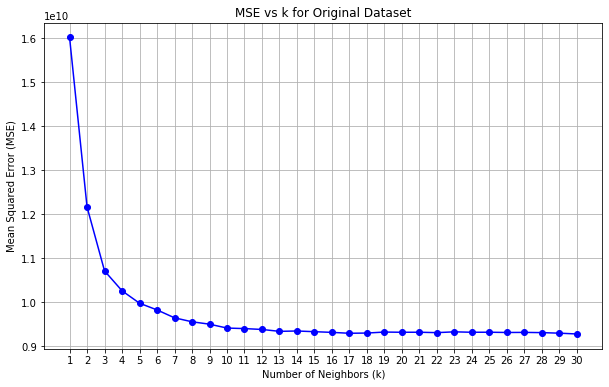

Optimal k for Original Dataset: 30
Minimum MSE for Original Dataset: 9276502605.268223
R-squared for the optimal k: 0.31010137397908



In [227]:
# KNN Regression for Original Dataset
k_values = range(1, 31)
predictors = shuffled_df.drop(columns=['median_house_value'])
X_train = train_original[predictors.columns]
y_train = train_original['median_house_value']
    
X_test = test_original[predictors.columns]
y_test = test_original['median_house_value']

mse_values = []
r2_values = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='blue')
plt.title('MSE vs k for Original Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k (minimum MSE)
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for Original Dataset: {optimal_k}")
print(f"Minimum MSE for Original Dataset: {min(mse_values)}")
print(f"R-squared for the optimal k: {r2_values[np.argmin(mse_values)]}\n")

KNN Regression for Outlier Removed Dataset

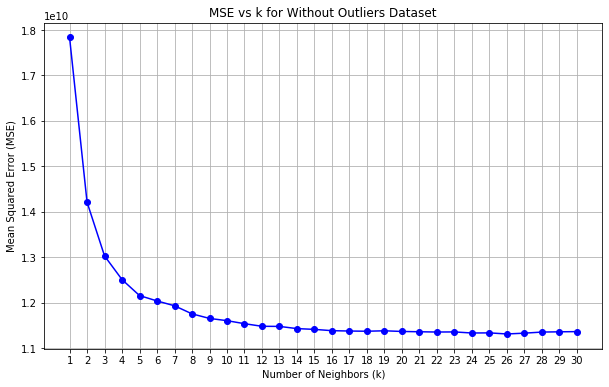

Optimal k for Without Outliers Dataset: 26
Minimum MSE for Without Outliers Dataset: 11311340458.932114
R-squared for the optimal k: 0.18822939243215697



In [228]:
# KNN Regression for Outlier Removed Dataset
predictors = df_without_outliers.drop(columns=['median_house_value'])
X_train = train_without_outliers[predictors.columns]
y_train = train_without_outliers['median_house_value']
    
X_test = test_without_outliers[predictors.columns]
y_test = test_without_outliers['median_house_value']

mse_values = []
r2_values = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='blue')
plt.title('MSE vs k for Without Outliers Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Finding the optimal k
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for Without Outliers Dataset: {optimal_k}")
print(f"Minimum MSE for Without Outliers Dataset: {min(mse_values)}")
print(f"R-squared for the optimal k: {r2_values[np.argmin(mse_values)]}\n")

KNN Regression for Mean Imputed Dataset

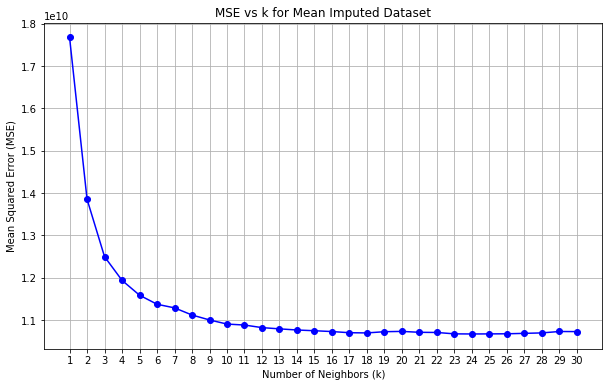

Optimal k for Mean Imputed Dataset: 24
Minimum MSE for Mean Imputed Dataset: 10668384896.50322
R-squared for the optimal k: 0.25961748250279426



In [229]:
# KNN Regression for Mean Imputed Dataset
predictors = mean_imputed_df.drop(columns=['median_house_value'])
X_train = train_mean_imputed[predictors.columns]
y_train = train_mean_imputed['median_house_value']
    
X_test = test_mean_imputed[predictors.columns]
y_test = test_mean_imputed['median_house_value']

mse_values = []
r2_values = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='blue')
plt.title('MSE vs k for Mean Imputed Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Finding the optimal k
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for Mean Imputed Dataset: {optimal_k}")
print(f"Minimum MSE for Mean Imputed Dataset: {min(mse_values)}")
print(f"R-squared for the optimal k: {r2_values[np.argmin(mse_values)]}\n")

KNN Regression for Median Imputed Dataset

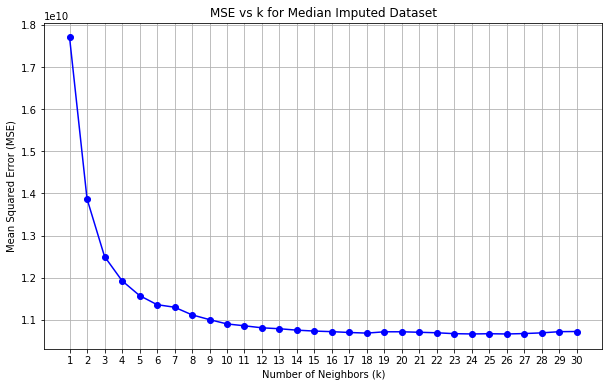

Optimal k for Median Imputed Dataset: 26
Minimum MSE for Median Imputed Dataset: 10666323409.877314
R-squared for the optimal k: 0.2597605490187367



In [230]:
# KNN Regression for Median Imputed Dataset
predictors = mean_imputed_df.drop(columns=['median_house_value'])
X_train = train_median_imputed[predictors.columns]
y_train = train_median_imputed['median_house_value']
    
X_test = test_median_imputed[predictors.columns]
y_test = test_median_imputed['median_house_value']

mse_values = []
r2_values = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='blue')
plt.title('MSE vs k for Median Imputed Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Finding the optimal k
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for Median Imputed Dataset: {optimal_k}")
print(f"Minimum MSE for Median Imputed Dataset: {min(mse_values)}")
print(f"R-squared for the optimal k: {r2_values[np.argmin(mse_values)]}\n")

<div style="font-size: large; color: yellow;">
    <ul>
        <li> MSE values goes down but at some point, for example k = 26 for median imputed, it goes stabilyze.
        <li> When we compare the MSE values manually, the original dataset got the minimum of MSE. It might be because of I removed the missing values of original dataset becaause of some kind of ValueError without doing it.
        <li> Without that case, removing outliers might be the best option to do.
        
</div>

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

Linear Regression For Original Dataset

In [231]:
# Linear Regression For Original Dataset
from sklearn.linear_model import LinearRegression

predictors = shuffled_df.drop(columns=['median_house_value'])
X_train = train_original[predictors.columns]
y_train = train_original['median_house_value']
X_test = test_original[predictors.columns]
y_test = test_original['median_house_value']

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Original Dataset:", mse)

Mean Squared Error (MSE) for Original Dataset: 5051891896.479384


Linear Regression For Outlier Handled Dataset

In [232]:
# Linear Regression For Outlier Handled Dataset
predictors = df_without_outliers.drop(columns=['median_house_value'])
X_train = train_without_outliers[predictors.columns]
y_train = train_without_outliers['median_house_value']
    
X_test = test_without_outliers[predictors.columns]
y_test = test_without_outliers['median_house_value']

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Outlier Handled Dataset:", mse)


Mean Squared Error (MSE) for Outlier Handled Dataset: 5524651736.572596


Linear Regression For Mean Imputed Dataset

In [233]:
# Linear Regression For Mean Imputed Dataset
predictors = mean_imputed_df.drop(columns=['median_house_value'])
X_train = train_mean_imputed[predictors.columns]
y_train = train_mean_imputed['median_house_value']
    
X_test = test_mean_imputed[predictors.columns]
y_test = test_mean_imputed['median_house_value']

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Mean Imputed Dataset:", mse)

Mean Squared Error (MSE) for Mean Imputed Dataset: 6007772178.785471


Linear Regression For Median Imputed Dataset

In [234]:
# Linear Regression For Median Imputed Dataset

predictors = mean_imputed_df.drop(columns=['median_house_value'])
X_train = train_median_imputed[predictors.columns]
y_train = train_median_imputed['median_house_value']
    
X_test = test_median_imputed[predictors.columns]
y_test = test_median_imputed['median_house_value']

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Median Imputed Dataset:", mse)

Mean Squared Error (MSE) for Median Imputed Dataset: 6010297695.959669


<div style="font-size: large; color: yellow;">
    <ul>
        <li> Again Original data gave better MSE value but as I said, I removed the missing values so it might be beccause of that. Other than, the lowest MSE is outlier handled situation.
        
</div>

## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

<div style="font-size: large; color: yellow;">
    <ul>
        <li> From looking at the MSE values, our dataset gave better result at LINEAR REGRESSION model.
        <li> This is actually unexpected in my opinion because kNN algorithm known as the success with small datas as our data.
        <li> Linear Regression known as better results with large datasets LR is computationally efficient.
        <li> For kNN and Linear Regression models, outlier handled data gave the best results.
        
</div>

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices